# Data Science and Artificial Intelligence Mini Project
## Part 2: Model Selection
### Team members: Jamie Sze, Tan Jie Hui, Wang Yi

In this section, we aim to evaluate different popular machine learning models and their accuracy in this particular use case of classifying earthquake damage. To do so, we will explore the use of 5 popular machine learning models, tune their hyperparameters to best fit our use case of multi-class classification and identify which model has the best accuracy

## Contents <a class="anchor" id="top"></a>

#### [Import Libraries and Datasets](#import)

#### [Data Preparation](#dataprep)
- [One Hot Encoding](#ohe)
- [Features and Labels](#features)
- [Splitting Dataset Into Train and Test](#split)

#### [Modelling and Classification](#model)
- [Model 1: Artificial Neural Network](#model1)
- [Model 2: Logistics Regression Classifier](#model2)
- [Model 3: K Nearest Neighbours](#model3)
- [Model 4: Decision Tree](#model4)
- [Model 5: Random Forest Classifier](#model5)

#### [Model Selection](#select)

#### [Appendix](#appendix)

## Import Libraries <a class="anchor" id="import"></a>

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
import sklearn.metrics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report,accuracy_score

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
import tensorflow as tf
from keras.utils import np_utils

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score

Using TensorFlow backend.


## Import Dataset

### Features of Buildings

In [3]:
eqData_train = pd.read_csv('train_values.csv')
eqData_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


### Labels of Buildings (Damage-Grade)

In [4]:
labels = pd.read_csv('train_labels.csv')
labels.head()
labels.shape

(260601, 2)

### Combining the datasets

In [5]:
cols = list(pd.read_csv("train_values.csv", nrows =1))
temp = pd.read_csv('train_values.csv',usecols =[i for i in cols if i != 'building_id'])

eqData_train = pd.concat([labels, temp], axis = 1)
eqData_train.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


## Data Preparation <a class="anchor" id="dataprep"></a>

### One-Hot-Encoding <a class="anchor" id="ohe"></a>

From the features observed above, we have to extract those categorical features and encode them using a one-hot-encoded process. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [6]:
categoricalcolumns = ["land_surface_condition", "foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration", "legal_ownership_status"]
eqData_train = pd.get_dummies(eqData_train, columns= categoricalcolumns, prefix= categoricalcolumns)
print(eqData_train)

        building_id  damage_grade  geo_level_1_id  geo_level_2_id  \
0            802906             3               6             487   
1             28830             2               8             900   
2             94947             3              21             363   
3            590882             2              22             418   
4            201944             3              11             131   
...             ...           ...             ...             ...   
260596       688636             2              25            1335   
260597       669485             3              17             715   
260598       602512             3              17              51   
260599       151409             2              26              39   
260600       747594             3              21               9   

        geo_level_3_id  count_floors_pre_eq  age  area_percentage  \
0                12198                    2   30                6   
1                 2812           

In [7]:
eqData_train.shape

(260601, 70)

In [8]:
eqData_train.dtypes

building_id                 int64
damage_grade                int64
geo_level_1_id              int64
geo_level_2_id              int64
geo_level_3_id              int64
                            ...  
plan_configuration_u        uint8
legal_ownership_status_a    uint8
legal_ownership_status_r    uint8
legal_ownership_status_v    uint8
legal_ownership_status_w    uint8
Length: 70, dtype: object

#### Final Dataset for Analysis

In [9]:
eqData_train.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,3,6,487,12198,2,30,6,5,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,2,8,900,2812,2,10,8,7,0,...,0,0,0,0,0,0,0,0,1,0
2,94947,3,21,363,8973,2,10,5,5,0,...,0,0,0,0,0,0,0,0,1,0
3,590882,2,22,418,10694,2,10,6,5,0,...,0,0,0,0,0,0,0,0,1,0
4,201944,3,11,131,1488,3,30,8,9,1,...,0,0,0,0,0,0,0,0,1,0


### Features <a class="anchor" id="features"></a>

In [10]:
###Removing labels from feature dataset 
features = eqData_train

###Removing unneccessary data from feature dataset 
features = features.drop(['building_id'],axis=1)
features = features.drop(['damage_grade'],axis=1)

### Labels

In [11]:
labels = eqData_train['damage_grade']

### Splitting the data into train and test containers <a class="anchor" id="split"></a>

In [12]:
train_X, test_X, train_Y, test_Y = train_test_split(features,labels,test_size=0.2, random_state=0)

[back to top](#top)

# Modelling and Classification <a class="anchor" id="model"></a>

We will be testing out a 5 machine learning models on the train dataset and checking the accuracy of each model.
1. Artificial Neural Network
2. Logistics Regression Classifier
3. K Nearest Neighbours
4. Decision Tree
5. Random Forest Classifier

## Model 1: Artificial Neural Network <a class="anchor" id="model1"></a>

Artificial Neural Network is a model that is inspired by the brain and tries to replicate the way that humans learn. It consists of one input layer, a few hidden layers, and one output layer, with each hidden layer analysing different features of the dataset. During the training stage, the algorithm will learn to detect features that are relevant to predicting the output (ie damage_grade). It can also make use of backpropagation to correct mistakes during the training process, thus improving the model.

We will first employ the default ANN model. Later on, we will tune its activation function and loss function to improve accuracy.

In [14]:
from keras import backend as K

def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

    
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
#     y_pred = K.round(y_pred > 0.5)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)


def matthewCoefficient(y_true, y_pred):
    y_pred = K.round(y_pred)
#     y_pred = K.round(y_pred > 0.5)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)
    matthewcoef = ((tp*tn) - (fp*fn))/ ((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5

#     p = tp / (tp + fp + K.epsilon())
#     r = tp / (tp + fn + K.epsilon())

#     f1 = 2*p*r / (p+r+K.epsilon())
    matthewcoef = tf.where(tf.math.is_nan(matthewcoef), tf.zeros_like(matthewcoef), matthewcoef)
    return K.mean(matthewcoef)


def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
    

In [15]:
X_train = train_X
y_train = train_Y.values
X_test = test_X
y_test = test_Y.values


y_train = one_hot_encode_object_array(y_train)
y_test = one_hot_encode_object_array(y_test)

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =3*8 , activation = 'relu', input_dim = 68))

# Adding the second hidden layer
classifier.add(Dense(units = 3*4, activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 3*2, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 3, activation = 'tanh'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'hinge', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 30)

score, accuracy = classifier.evaluate(X_test, y_test, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Epoch 1/30
208480/208480 [==============================] - 10s 46us/step - loss: 0.8871 - accuracy: 0.3347
Epoch 2/30
208480/208480 [==============================] - 10s 47us/step - loss: 0.8871 - accuracy: 0.3347
Epoch 3/30
208480/208480 [==============================] - 9s 41us/step - loss: 0.8190 - accuracy: 0.2601
Epoch 4/30
208480/208480 [==============================] - 9s 44us/step - loss: 0.6667 - accuracy: 0.0966
Epoch 5/30
208480/208480 [==============================] - 11s 51us/step - loss: 0.6667 - accuracy: 0.0966
Epoch 6/30
208480/208480 [==============================] - 10s 49us/step - loss: 0.6667 - accuracy: 0.09660s - loss: 0.6667 - 
Epoch 7/30
208480/208480 [==============================] - 15s 70us/step - loss: 0.6667 - accuracy: 0.0966
Epoch 8/30
208480/208480 [==============================] - 12s 56us/step - loss: 0.6667 - accuracy: 0.0966
Epoch 9/30
208480/208480 [==============================] - 8s 41us/step - loss: 0.6667 - accuracy: 0.0966
Epoch 10/30

### Optimizing ANN Parameters: Activation for Output Layer & Loss Function <a class="anchor" id="op1"></a>

The activation function for the output layer was initially tanh. However, tanh is more appropriate for binary classification instead of multi-class classification. As such, we changed the activation for output layer from tanh to softmax. Softmax outputs produce a vector that is non-negative and sums to 1. It is useful for mutually exclusive categories, making it highly ideal for our use case.

The loss function was initially hinge. However, hinge is a loss function used for binary classification. Once again, we tuned the parameter to be most ideal for multi-class classification. As such, we used categorical_crossentropy, a loss function used for multi-class classification. Categorical crossentropy will compare the distribution of the predictions (the activations in the output layer, one for each class) with the true distribution, where the probability of the true class is set to 1 and 0 for the other classes. 

In [84]:
X_train = train_X
y_train = train_Y.values
X_test = test_X
y_test = test_Y.values


y_train = one_hot_encode_object_array(y_train)
y_test = one_hot_encode_object_array(y_test)

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =3*8 , activation = 'relu', input_dim = 68))

# Adding the second hidden layer
classifier.add(Dense(units = 3*4, activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 3*2, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 3, activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 30)

score, accuracy = classifier.evaluate(X_test, y_test, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

ann_acc = accuracy*100

Epoch 1/30
208480/208480 [==============================] - 8s 39us/step - loss: 2.6630 - accuracy: 0.5066
Epoch 2/30
208480/208480 [==============================] - 8s 36us/step - loss: 0.9879 - accuracy: 0.5382
Epoch 3/30
208480/208480 [==============================] - 9s 41us/step - loss: 0.8573 - accuracy: 0.5713
Epoch 4/30
208480/208480 [==============================] - 9s 44us/step - loss: 0.8350 - accuracy: 0.5725
Epoch 5/30
208480/208480 [==============================] - 8s 38us/step - loss: 0.8230 - accuracy: 0.5742
Epoch 6/30
208480/208480 [==============================] - 7s 35us/step - loss: 0.8197 - accuracy: 0.5743
Epoch 7/30
208480/208480 [==============================] - 7s 34us/step - loss: 0.8188 - accuracy: 0.5741
Epoch 8/30
208480/208480 [==============================] - 7s 34us/step - loss: 0.8167 - accuracy: 0.5746
Epoch 9/30
208480/208480 [==============================] - 7s 33us/step - loss: 0.8156 - accuracy: 0.5751
Epoch 10/30
208480/208480 [==========

The tuned ANN model returns a higher accuracy of 0.6, as compared to untuned accuracy at 0.57. 

[back to top](#top)

## Model 2: Logistics Regression classifier <a class="anchor" id="model2"></a>

The logistic function, which this model is based on, is an S-shaped curve that takes any real number as input and outputs y, where 0<y<1. This algorithm models the the probablity of either one of the outcomes (ie damage_grade), and works by estimating Beta values from training data such that the error in probabilities predicted is minimised. Although it is mostly used for binary classification, it can be modified to be used for more than 2 outcomes.

We will first employ the default logistics regression classifier. We first set the class_weight to balanced, to give more weight to minority classes. Later on, we will tune the solvers to optimize model accuracy.

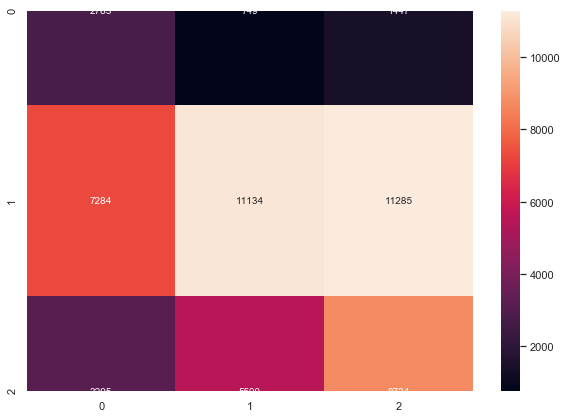

The standard accuracy score is:  0.4345849081943938
The recall score is:  0.4345849081943938
The matthew's correlation coefficient is:  0.13683648271691962


In [85]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report



#Build the model
clf = LogisticRegression(class_weight='balanced') # We set classweight=balanced to give more weight to minority class

# Train the classifier
clf.fit(train_X, train_Y)

#test the model
preds = clf.predict(test_X)

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(test_Y, preds), annot=True, fmt='d')
plt.show()



print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

log_reg_acc = round( accuracy_score(test_Y.values, preds) * 100, 2)

### Optimzing Logistic Regression Parameters: Solvers <a class="anchor" id="op2"></a>

For logistic regression, there is no single criticial hyperparameter to tune. However, tuning solvers can sometimes give better performance. From the scikit documentation (https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) , the 5 solvers are: “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. 

The “lbfgs” solver is used by default for its robustness. The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers. Each solver has its merits and demerits which are listed on the scikit documentation, and we tested all 5 solvers.

Based on our trial and erorr, we found the liblinear solver returns highest accuracy. This is likely because logistic regression model using this solver behave as multiclass classifiers, which is appropriate for our use case.  

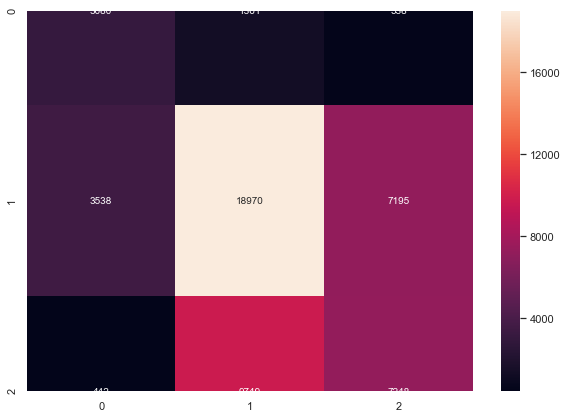

The standard accuracy score is:  0.5621150783753189
The recall score is:  0.5621150783753189
The matthew's correlation coefficient is:  0.2216200301771318


In [86]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report



#Build the model
clf = LogisticRegression(class_weight='balanced', solver = 'liblinear') # We set classweight=balanced to give more weight to minority class

# Train the classifier
clf.fit(train_X, train_Y)

#test the model
preds = clf.predict(test_X)

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(confusion_matrix(test_Y, preds), annot=True, fmt='d')
plt.show()


print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

log_reg_acc = round( accuracy_score(test_Y.values, preds) * 100, 2)

With the optimal solver, the accuracy for logistic regression significantly improved from 0.43 to 0.56.

[back to top](#top)

## Model 3: K Nearest Neighbours <a class="anchor" id="model3"></a>

K Nearest Neighbours is based on the idea of proximity, that is, data points with similar features are more likely to have the same output (ie damage_grade). It works by computing the distance between data points and creating clusters that minimises distance between them, iterating a few times to achieve the best results. We will need to test a few values of K to find the K that produces the best predictions.

For KNN model, the most critical hyperparameter is number of neighbours, n_neighbors. n_neighbors have test value between 1 and 21. We tested out the accuracy of KNN model with n_neighbors of different values and found that n_neighbours = 10 gives highest accuracy. You may refer to appendix for KNN models with other n_neighbour values we attempted. 

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_X, train_Y)
Y_pred = knn.predict(test_X)

print("The standard accuracy score is: ", knn.score(test_X, test_Y))

knn_acc = round(knn.score(test_X, test_Y) * 100, 2)

The standard accuracy score is:  0.7101360296233764


[back to top](#top)

## Model 4: Decision Tree <a class="anchor" id="model4"></a>

This method teaches the model to make decisions based on the given data, by learning which features are more important in making the decision. It can be used for both regression and classification, but for this purpose, we will be using it to do classification. At each node of the tree, the model will make binary splits in such a way that minimises the cost function (such as Gini, for classification), making it a greedy algorithm.

We test out a default decision tree model.

In [88]:
# decision tree with train data
dectree = DecisionTreeClassifier () # create the decision tree object
dectree.fit(train_X, train_Y.values)      # train the decision tree model

# predict responses
y_train_pred = dectree.predict(train_X)
y_test_pred = dectree.predict(test_X)


# check goodness of model with test data
print("Goodness of Fit of Model for Test Dataset")
print("Classification Accuracy:", dectree.score(test_X, test_Y.values))
print("Recall score: ", sklearn.metrics.recall_score(test_Y.values, y_test_pred, average='micro'))
print("Matthew's correlation coefficient: ", sklearn.metrics.matthews_corrcoef(test_Y.values, y_test_pred))

decision_tree_acc = round(dectree.score(test_X, test_Y.values) * 100, 2)

Goodness of Fit of Model for Test Dataset
Classification Accuracy: 0.6599834999328485
Recall score:  0.6599834999328485
Matthew's correlation coefficient:  0.388353774211266


### Optimizing Decision Tree: Max_depth <a class="anchor" id="op4"></a>

The first parameter to tune is max_depth, which implies how deep the tree can be. The larger the max_depth value, the deeper the tree, the more splits it has. That means it is able to capture more information about our data set. 

Based on our trial and error, we found that max_depth = 20 gave highest accuracy. At larger max_depth values, our model likely overfits - where it  predicts all of the train data but does not generalize the findings for new data. At smaller max_depth values, our model does not predict the train data as accurately. The optimal max_depth value of 20 allows the model to predict the train data and generalize the findings for new data reasonably well.

In [89]:
# decision tree with train data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(train_X, train_Y.values)      # train the decision tree model

# predict responses
y_train_pred = dectree.predict(train_X)
y_test_pred = dectree.predict(test_X)


# check goodness of model with test data
print("Goodness of Fit of Model for Test Dataset")
print("Classification Accuracy:", dectree.score(test_X, test_Y.values))
print("Recall score: ", sklearn.metrics.recall_score(test_Y.values, y_test_pred, average='micro'))
print("Matthew's correlation coefficient: ", sklearn.metrics.matthews_corrcoef(test_Y.values, y_test_pred))

decision_tree_acc = round(dectree.score(test_X, test_Y.values) * 100, 2)

Goodness of Fit of Model for Test Dataset
Classification Accuracy: 0.6966673701579018
Recall score:  0.6966673701579018
Matthew's correlation coefficient:  0.44222634287193313


[back to top](#top)

## Model 5: Random Forest Classifier <a class="anchor" id="model5"></a>

This model can be used for both classification and regression, and is built on top of the Decision Tree method (Method 4). It workd by randomly selects data subsets, creates decision trees on each subset, and then vote for the best solution. The more trees there are in the forest, the more robust the model. While Random Forest can eliminate the problem of overfitting that a normal Decision Tree might experience, it is slower and might be difficult to interpret.

We first employ a random forest classifier with default parameters.

[2 3 2 ... 2 2 2]
The standard accuracy score is:  0.7114023138466261
The recall score is:  0.7114023138466261
The matthew's correlation coefficient is:  0.4595153215600796


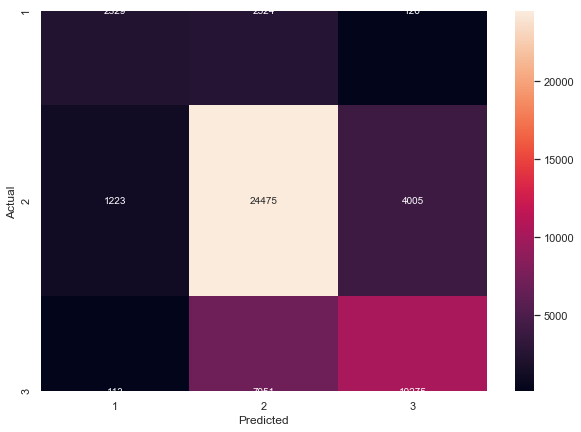

In [90]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion="gini",
                             n_estimators=100,
                             verbose=False)

clf.fit(train_X, train_Y.values)
preds = clf.predict(test_X)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

random_forest_acc = round( accuracy_score(test_Y.values, preds) * 100, 2)

Interestingly, without hyperparameter tuning for Random Forest, this model already yields highest accuracy among all 5 models. In section 3, we will deep dive into hyperparameter tuning to further improve the Random Forest model.

[back to top](#top)

# Model Selection <a class="anchor" id="select"></a>

In [91]:
models = pd.DataFrame({
    'Model': [ 'Decision Tree', 'Logistic Regression', 'Random Forest','KNN','ANN'],
    'Score': [ decision_tree_acc,log_reg_acc, random_forest_acc, knn_acc, ann_acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,71.140000
3,KNN,71.010000
0,Decision Tree,69.670000
4,ANN,59.954721
1,Logistic Regression,56.210000


The model with the highest accuracy is Random Forest. Random Forest is a classifcation model that comprises of many decision trees, and likely works well in this use case where the data set has many variables. 

Even though Random Forest and KNN have very similar accuracy scores, we must note that Random Forest has more hyperparameters we have yet to tune, unlike KNN which main hyperparameter to tune is number of neighbours. This means that Random Forest has even more potential for further tuning to improve its accuracy.

Random Forest also has a short run time, especially compared to ANN model. 

With its high accuracy and short run time compared to the other models, we will select Random Forest as our model of choice. In the next part, we will employ various techniques to improve the accuracy of the Random Forest model. 

[back to top](#top)

# Appendix <a class="anchor" id="appendix"></a>

### KNN Model with n_neighbours varied

KNN Model at lower bound value of n_neighbours

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_Y)
Y_pred = knn.predict(test_X)

print("The standard accuracy score is: ", knn.score(test_X, test_Y))

knn_acc = round(knn.score(test_X, test_Y) * 100, 2)

The standard accuracy score is:  0.6916214193894975


KNN Model at n_neighbours =11, where optimal n_neighbours = 10

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(train_X, train_Y)
Y_pred = knn.predict(test_X)

print("The standard accuracy score is: ", knn.score(test_X, test_Y))

knn_acc = round(knn.score(test_X, test_Y) * 100, 2)

The standard accuracy score is:  0.7098482377544559


[back to top](#top)